<a href="https://colab.research.google.com/github/Misha-private/Demo-repo/blob/main/Home_MLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt


def agragate_data(htm3, htm2, htm1, wtm3, wtm2, wtm1, bias1, bias2, bias3, agtm, im, jm):
  for i in range(1,im-1):
    for j in range(1,jm-1):
      agtm3 = htm3[i-1,j]*wtm3[i-1,j]+bias3[i-1,j]
      +       htm3[i+1,j]*wtm3[i+1,j]+bias3[i+1,j]
      +       htm3[i,j-1]*wtm3[i,j-1]+bias3[i,j-1]
      +       htm3[i,j+1]*wtm3[i,j+1]+bias3[i,j+1]
      +       htm3[i-1,j-1]*wtm3[i-1,j-1]+bias3[i-1,j-1]
      +       htm3[i-1,j+1]*wtm3[i-1,j+1]+bias3[i-1,j+1]
      +       htm3[i+1,j-1]*wtm3[i+1,j-1]+bias3[i+1,j-1]
      +       htm3[i+1,j+1]*wtm3[i+1,j+1]+bias3[i+1,j+1]
      +       htm3[i,j]*wtm3[i,j]+bias3[i,j]
      agtm2 = htm2[i-1,j]*wtm2[i-1,j]+bias2[i-1,j]
      +       htm2[i+1,j]*wtm2[i+1,j]+bias2[i+1,j]
      +       htm2[i,j-1]*wtm2[i,j-1]+bias2[i,j-1]
      +       htm2[i,j+1]*wtm2[i,j+1]+bias2[i,j+1]
      +       htm2[i-1,j-1]*wtm2[i-1,j-1]+bias2[i-1,j-1]
      +       htm2[i-1,j+1]*wtm2[i-1,j+1]+bias2[i-1,j+1]
      +       htm2[i+1,j-1]*wtm2[i+1,j-1]+bias2[i+1,j-1]
      +       htm2[i+1,j+1]*wtm2[i+1,j+1]+bias2[i+1,j+1]
      +       htm2[i,j]*wtm2[i,j]+bias2[i,j]
      agtm1 = htm1[i-1,j]*wtm1[i-1,j]+bias1[i-1,j]
      +       htm1[i+1,j]*wtm1[i+1,j]+bias1[i+1,j]
      +       htm1[i,j-1]*wtm1[i,j-1]+bias1[i,j-1]
      +       htm1[i,j+1]*wtm1[i,j+1]+bias1[i,j+1]
      +       htm1[i-1,j-1]*wtm1[i-1,j-1]+bias1[i-1,j-1]
      +       htm1[i-1,j+1]*wtm1[i-1,j+1]+bias1[i-1,j+1]
      +       htm1[i+1,j-1]*wtm1[i+1,j-1]+bias1[i+1,j-1]
      +       htm1[i+1,j+1]*wtm1[i+1,j+1]+bias1[i+1,j+1]
      +       htm1[i,j]*wtm1[i,j]+bias1[i,j]
      agtm[i,j] = agtm3 + agtm2 + agtm1

      m = nn.Sigmoid()
      agtm[i,j] = m(agtm[i,j])

    return agtm


In [ ]:
def lin_interp(V,nmax,mmax,IL,JL,ALPHA,BETA,H):
  for n in range(nmax):
    i = IL[n]
    a = ALPHA[n]
    for m in range(mmax):
      j = JL[m]
      b = BETA[m]
      H[n,m] = (1-a)*(1-b)*V[i,j] + a*(1-b)*V[i+1,j] + (1-a)*b*V[i,j+1] + a*b*V[i+1,j+1]

  return H


In [ ]:
def lin_adjoint(H,nmax,mmax,IL,JL,ALPHA,BETA,V):
  for m in range(mmax):
    j = JL[m]
    b = BETA[m]
    for n in range(nmax):
      i = IL[n]
      a = ALPHA[n]
      V[i,j] = V[i,j]+(1-a)*(1-b)*H[n,m]
      V[i+1,j] = V[i+1,j]+a*(1-b)*H[n,m]
      V[i,j+1] = V[i,j+1]+(1-a)*b*H[n,m]
      V[i+1,j+1] = V[i+1,j+1]+a*b*H[n,m]

  return V



In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

scalar = torch.tensor(5)
scalar.ndim
scalar.shape

torch.Size([])

In [ ]:
vector = torch.tensor([1,2,3])
vector.ndim
vector.shape

torch.Size([3])

In [ ]:
vector2 = torch.tensor([[1,2,3],
                      [4,5,6],
                      [7,8,9]])
vector2.ndim
vector2.shape
vector2.dtype

torch.int64

In [ ]:
matrix = torch.tensor([[1,2,3],
                      [4,5,6],
                      [7,8,9]])
print(f"matrix.ndim={matrix.ndim}")
print(f"matrix.shape={matrix.shape}")
print(f"matrix.dtype={matrix.dtype}")

matrix.ndim=2
matrix.shape=torch.Size([3, 3])
matrix.dtype=torch.int64


In [ ]:
matrix2 = torch.tensor([[10.,20.],
                        [30.,40.]])
print(f"matrix2.ndim={matrix2.ndim}")
print(f"matrix2.shape={matrix2.shape}")
print(f"matrix2.dtype={matrix2.dtype}")

matrix2.ndim=2
matrix2.shape=torch.Size([2, 2])
matrix2.dtype=torch.float32


In [ ]:
torch.rand(size=(4,4))

tensor([[0.0229, 0.5428, 0.4188, 0.7370],
        [0.1374, 0.1367, 0.0111, 0.9688],
        [0.4354, 0.5227, 0.0826, 0.3153],
        [0.6149, 0.5340, 0.8401, 0.0239]])

In [ ]:
torch.zeros(size=(4,4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
torch.ones(size=(4,4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])
a*b
for i in range(2):
  print(a[i+1])

tensor(2)
tensor(3)


In [ ]:
A = torch.tensor([[1.,2.,3.],
                  [4.,5.,6.],
                  [7.,8.,9.]])
print(A[0,0])
print(A[0,1])
print(A[0,2])

tensor(1.)
tensor(2.)
tensor(3.)


In [ ]:
for i in range(3):
  print(i)

0
1
2


In [ ]:
for i in range(1,10):
  print(i)

1
2
3
4
5
6
7
8
9


In [ ]:
a = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
ap1 = torch.roll(a,-1,1)
print(a)
print(ap1)


tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([[2, 3, 1],
        [5, 6, 4],
        [8, 9, 7]])


# Adjoint interpolations

0 0.03141075907812829
1 0.09410831331851431
2 0.15643446504023087
3 0.2181432413965425
 

0.03125
h[i]
hf[i]


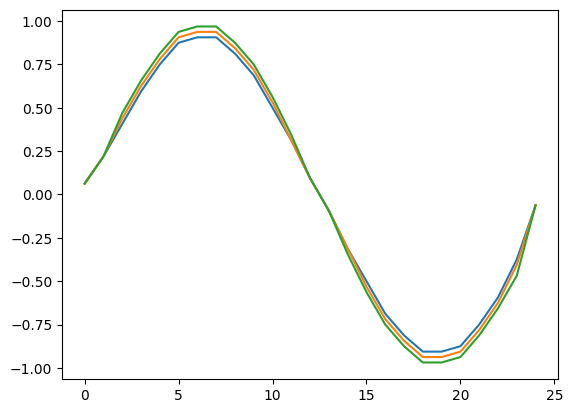

In [ ]:
for n in range(0,4):
  print(n,y[n])

print(' ')

y[-1]=y[0]
y[-2]=y[1]
y[-3]=y[2]
y[-4]=y[3]

#print(' ')
#print(f'y[99]={y[99]}')

#y = np.append(y,y[100])
#y = np.append(y,y[99])
#y = np.append(y,y[98])
#y = np.append(y,y[97])


h = np.arange(0,25)
r32 = 1/32.
print("")
print(r32)


print("h[i]")
for i in range(0,25):
  n = 4*i
  h[i] = (7.*y[n]  + 5.*y[n+1] + 3.*y[n+2] + y[n+3]
  +       7.*y[n-1]+ 5.*y[n-2] + 3.*y[n-3] + y[n-4])


hf = np.arange(0,25)
hff = np.arange(0,25)
print("hf[i]")
for i in range(1,24):
  hf[i] = 0.25*(h[i-1]+2*h[i]+h[i+1])
#  print(hf[i])
hf[0] = h[0]
hf[24] = h[24]
for i in range(1,24):
  hff[i] = 0.25*(hf[i-1]+2*hf[i]+hf[i+1])
hff[0] = hf[0]
hff[24] = hf[24]

plt.plot(hff/32)
plt.plot(hf/32)



plt.plot(h/32)
plt.show()

# 4th order interpolation

0 4 0.29028467725446233 0.13045630686207466
1 7 0.47139673682599764 0.32126736258784794
2 10 0.6343932841636455 0.49973229373818273
3 13 0.773010453362737 0.6589927930932584
4 16 0.8819212643483549 0.7929285689771761
5 19 0.9569403357322089 0.8963925446347654
6 22 0.9951847266721968 0.9654086575047713
7 25 0.9951847266721969 0.9973246570742813
8 28 0.9569403357322089 0.990914029378538
9 31 0.881921264348355 0.9464231312447673
10 34 0.7730104533627371 0.865561722937467
11 37 0.6343932841636455 0.7514372630302865
12 40 0.47139673682599786 0.6084354905157241
13 43 0.2902846772544624 0.4420518833151964
14 46 0.09801714032956083 0.2586804701444181
15 49 -0.09801714032956059 0.06536811157566863
16 52 -0.2902846772544621 -0.13045630686207485
17 55 -0.47139673682599764 -0.3212673625878478
18 58 -0.6343932841636453 -0.49973229373818295
19 61 -0.7730104533627367 -0.6589927930932583
20 64 -0.8819212643483549 -0.7929285689771759
21 67 -0.9569403357322088 -0.8963925446347654
22 70 -0.99518472667219

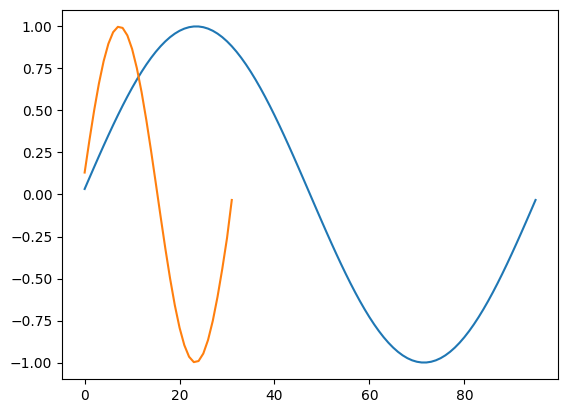

In [ ]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt

#x = np.arange(0,100)
#xp = x/100 + 0.005

x = np.arange(0,96)
xp = x/96+ (1/96 *0.5)

#for i in x:
#  print(i,xp[i])

xp = 2*np.pi*xp
y = np.sin(xp)

h = np.arange(0,32)
h= np.zeros(32)

i = 1
for n in range(0,31):
#  h[n] = 9./8.*(y[i]+y[i+1])-1./8.*(y[i-1]+y[i+2])
  h[n] = (y[i]+y[i+1])/2
#  h[n] = y[i]
  i = i + 3
  print(n,i,y[i],h[n])
#  print(h[n])


h[31] = y[95]

plt.plot(y)
plt.plot(h)

plt.show()




0 0.005
1 0.015
2 0.025
3 0.034999999999999996
4 0.045
5 0.055
6 0.065
7 0.07500000000000001
8 0.085
9 0.095
10 0.10500000000000001
11 0.115
12 0.125
13 0.135
14 0.14500000000000002
15 0.155
16 0.165
17 0.17500000000000002
18 0.185
19 0.195
20 0.20500000000000002
21 0.215
22 0.225
23 0.23500000000000001
24 0.245
25 0.255
26 0.265
27 0.275
28 0.28500000000000003
29 0.295
30 0.305
31 0.315
32 0.325
33 0.335
34 0.34500000000000003
35 0.355
36 0.365
37 0.375
38 0.385
39 0.395
40 0.405
41 0.415
42 0.425
43 0.435
44 0.445
45 0.455
46 0.465
47 0.475
48 0.485
49 0.495
50 0.505
51 0.515
52 0.525
53 0.535
54 0.545
55 0.555
56 0.5650000000000001
57 0.575
58 0.585
59 0.595
60 0.605
61 0.615
62 0.625
63 0.635
64 0.645
65 0.655
66 0.665
67 0.675
68 0.685
69 0.695
70 0.705
71 0.715
72 0.725
73 0.735
74 0.745
75 0.755
76 0.765
77 0.775
78 0.785
79 0.795
80 0.805
81 0.8150000000000001
82 0.825
83 0.835
84 0.845
85 0.855
86 0.865
87 0.875
88 0.885
89 0.895
90 0.905
91 0.915
92 0.925
93 0.935
94 0.945
95

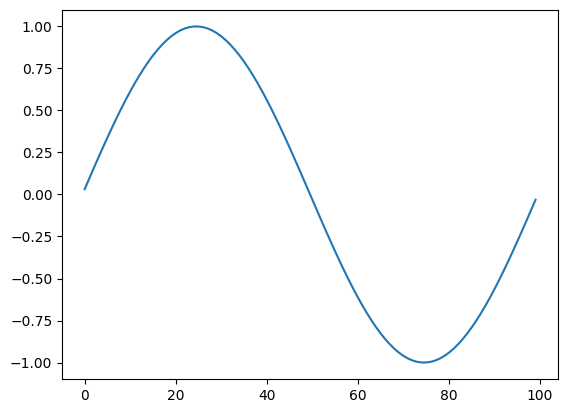

In [ ]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.arange(0,100)
xp = x/100 + 0.005

for i in x:
  print(i,xp[i])

xp = 2*np.pi*xp
y = np.sin(xp)


plt.plot(x,y)
plt.show()

# Upsending

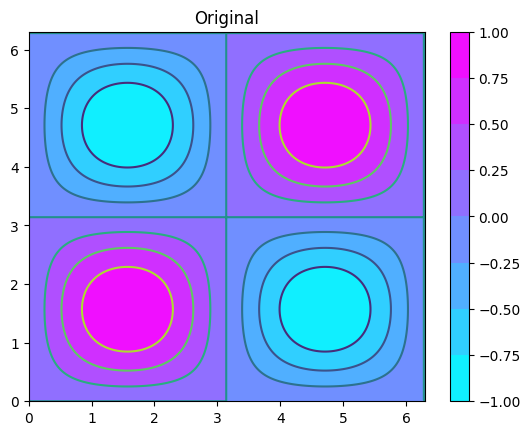

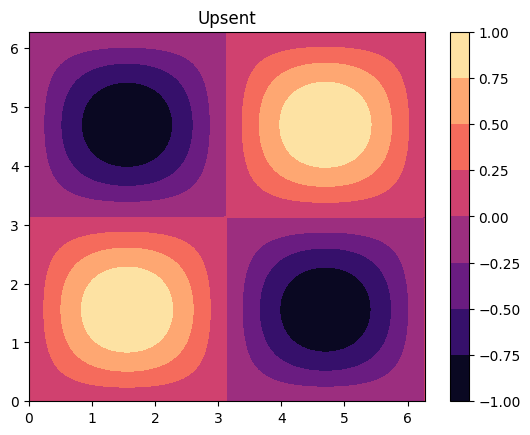

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

im1 = 256+2
jm1 = 256+2

im2 = 128+1
jm2 = 128+1

G1 = np.zeros(shape=(im1,jm1))
G2 = np.zeros(shape=(im2,jm2))


x1 = np.arange(0,im1)
y1 = np.arange(0,jm1)

xp1 = x1/(im1-2)
yp1 = y1/(jm1-2)

xp1 = 2*np.pi*xp1
yp1 = 2*np.pi*yp1

for i in range(0,im1):
  for j in range(0,jm1):
    G1[i,j] = np.sin(xp1[i])*np.sin(yp1[j])

plt.contour(xp1, yp1, G1)


plt.contourf(xp1, yp1, G1, cmap='cool')
plt.colorbar()
plt.title('Original')

plt.show()

#
# Upsending: Get G2 through linear interpolations
#

i1 = 0
for i2 in range(0,im2):
  j1 = 0
  for j2 in range(0,jm2):
    G2[i2,j2] = 0.25*(G1[i1,j1]+G1[i1+1,j1]+G1[i1,j1+1]+G1[i1+1,j1+1])
    j1 = j1 + 2
  i1 = i1 + 2

x2 = np.arange(0,im2)
y2 = np.arange(0,jm2)

xp2 = x2/(im2-1)
yp2 = y2/(jm2-1)

xp2 = 2*np.pi*xp2
yp2 = 2*np.pi*yp2

plt.contourf(xp2, yp2, G2, cmap='magma')
plt.colorbar()
plt.title('Upsent')

plt.show()


